<a href="https://colab.research.google.com/github/sarathsreedharan/CSU_CS_445/blob/main/Spring25/Notebooks/module06_01_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\Uv}{\mathbf{U}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}$

# Linear Dimensionality Reduction

## Principal Components Analysis (PCA)

Principal Components Analysis (PCA) is a way to find and use directions in the data space along which data samples vary the most.

Assume samples have $D$ attributes, meaning each sample is
$D$-dimensional.  We want to linearly project each sample to a smaller space,
of dimension $M < D$ such that as much information about each sample is maintained as possible.  One way to characterize the information is by the variance of the data.  We want the projected data to have the maximum variance.

Let's assume each sample $\xv_n$ has a mean of zero.  For $M=1$, we want
the direction vector (unit length) $\uv_1$ that maximizes the variance
of each projected sample. This variance is the average of the unit vector (transposed) times all samples, squared.
$$
\frac{1}{N} \sum_{n=1}^N (\uv_1^T \xv_n)^2 = \uv_1^T \Sv \uv_1
$$
where $\Sv$ is the average of the set of $\xv_n$ times itself (transposed).
$$
\Sv = \frac{1}{N} \sum_{n=1}^N \xv_n \xv_n^T
$$
To maximize $\uv_1^T \Sv \uv_1$ in a non-trivial way, we constrain
$\uv_1^T \uv_1 = 1$.  This constraint is added with a Lagrange
multipler so that we want $\uv_1$ that maximizes
$$
 \uv_1^T \Sv \uv_1+ \lambda_1(1-\uv_1^T \uv_1) = \Sv \uv_1^T \uv_1+(\lambda_1-\lambda_1\uv_1^T \uv_1)
$$
Setting the derivative of this with respect to $\uv_1$ equal to zero we find
that
$$
\Sv \uv_1 = \lambda_1 \uv_1
$$
so $\uv_1$ is an eigenvector of $\Sv$ and $\lambda_1$ is an eigenvalue
that is the variance of the projected samples.

What's an eigenvector? It's a nonzero vector that changes at most by a scalar factor (the *eigenvalue*) when an associated linear transformation is applied to it.  $\uv_1$ is the eigenvector of $\Sv$, the linear transformation, and $\lambda_1$ is the eigenvalue.

Additional directions, all orthogonal to each other, are found by the
eigendecomposition\* of $\Sv$, or, equivalently, the singular value
decomposition of data sample matrix $\Xv$ with mean zero.

\*Eigendecomposition: the factorization of a matrix ($\Sv$) into a form represented by its eigenvectors and eigenvalues.
$$
\Uv \Sigmav \Vv^T = \Xv
$$
This is called the **singular value decomposition** (SVD).  The columns of $\Vv$ are the eigenvectors of $\Sv$ and the elements of the
diagonal matrix $\Sigmav$ are the square root of the eigenvalues.  $\Sigmav$ is called the **singular values**.

    X = X - np.mean(X,axis=0)
    U,S,V = np.linalg.svd(X)
    V = V.T
    
Then, to project onto the eigenvectors, just

    proj = X @ V

Covariance matrix: square matrix giving the covariance between each pair of elements of a given random vector. (Review notebook 09)

Let's generate some two-dimensional samples from a Normal distribution
with mean [0,4] and covariance matrix
$\Sigma=\begin{bmatrix} 0.9 & 0.8\\ 0.8 & 0.9 \end{bmatrix}$.  Then we
will calculate the SVD of the samples and project the samples to the
two eigenvectors.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.multivariate_normal?

In [ ]:
n_samples = 200
data = np.random.multivariate_normal([0, 4], [[0.9, 0.8], [0.8, 0.9]], n_samples)
data.shape

(200, 2)

We can write our own multivariate normal random number generater like this, using the univariate np.random.normal function.

In [ ]:
def mv_normal(n, mean, sigma):
    mean = np.array(mean) # to allow entry of values as simple lists
    sigma = np.array(sigma)
    X = np.random.normal(0, 1, n * len(mean)).reshape((n, len(mean)))
    return np.dot(X, np.linalg.cholesky(sigma)) + mean

N = 200
data = mv_normal(N, [0, 4], [[0.9, 0.8], [0.8, 0.9]])
data.shape

(200, 2)

In [ ]:
means = np.mean(data, axis=0)
datan = data - means

U, S, V = np.linalg.svd(datan)
V = V.T
U.shape, S.shape, V.shape

((200, 200), (2,), (2, 2))

In [ ]:
V

array([[ 0.97418457,  0.22575303],
       [ 0.22575303, -0.97418457]])

In [ ]:
V[:, 0] @ V[:, 1]

0.0

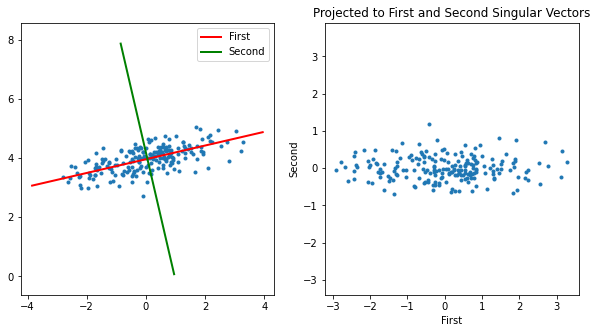

In [ ]:
def drawline(v, means, length, color, label):
  p1 = means - v * length / 2
  p2 = means + v * length / 2
  plt.plot([p1[0], p2[0]], [p1[1], p2[1]], label=label, color=color, linewidth=2)


def plot_original_and_transformed(data, V):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(data[:, 0], data[: ,1], '.')
    means = np.mean(data, axis=0)
    drawline(V[:, 0], means, 8, "red", "First")
    drawline(V[:, 1], means, 8, "green", "Second")
    leg = plt.legend()
    plt.axis('equal')
    plt.gca().set_aspect('equal')


    plt.subplot(1, 2, 2)
    proj = (data - means) @ V
    plt.plot(proj[:, 0], proj[:, 1], '.')
    plt.axis('equal')
    plt.gca().set_aspect('equal')
    plt.xlabel("First")
    plt.ylabel("Second")
    plt.title("Projected to First and Second Singular Vectors");

plot_original_and_transformed(data, V)

Now, if we have two classes of data, we might be able to classify the
data well with just the projection onto just one eigenvector.    Could
be either eigenvector.

First, with second class having mean [-5,3] and
$\Sigma=\begin{bmatrix} 0.9 & -0.8\\ -0.8 & 0.9 \end{bmatrix}$.

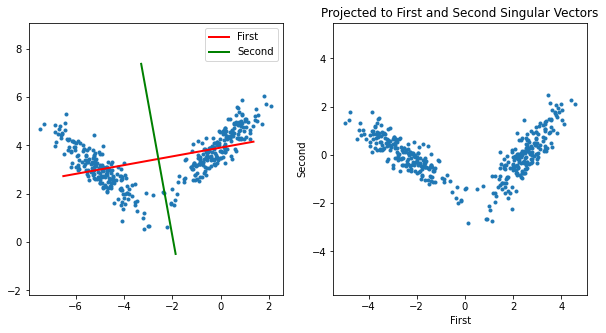

In [ ]:
N = 200
data1 = np.random.multivariate_normal([0, 4], [[0.9 ,0.8], [0.8, 0.9]], N)
data2 = np.random.multivariate_normal([-5, 3], [[0.9, -0.8], [-0.8, 0.9]], N)
data = np.vstack((data1, data2))

means = np.mean(data, axis=0)

U, S ,V = np.linalg.svd(data - means)
V = V.T

plot_original_and_transformed(data, V)

And again, with first class
$\Sigma=\begin{bmatrix} 0.9 & 0.2\\ 0.2 & 20 \end{bmatrix}$
and second class having
$\Sigma=\begin{bmatrix} 0.9 & -0.2\\ -0.2 & 20 \end{bmatrix}$.

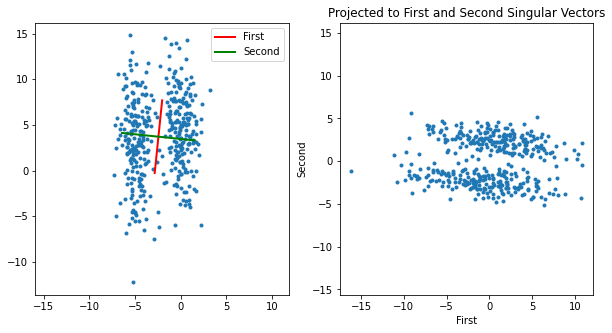

In [ ]:
N = 200
data1 = np.random.multivariate_normal([0, 4], [[0.9 ,0.2], [0.2, 20]], N)
data2 = np.random.multivariate_normal([-5, 3], [[0.9, -0.2], [-0.2, 20]], N)
data = np.vstack((data1, data2))

means = np.mean(data, axis=0)

U, S ,V = np.linalg.svd(data - means)
V = V.T

plot_original_and_transformed(data, V)

# Examples of Linear Dimensionality Reduction

## Principal Components Analysis (PCA)

Let's apply PCA to the MNIST digits.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
import pickle

In [ ]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape((-1,1))

Xtest = test_set[0]
Ttest = test_set[1].reshape((-1,1))

Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((50000, 784), (50000, 1), (10000, 784), (10000, 1))

In [ ]:
Xmean = Xtrain.mean(axis=0)
Xmean.shape

(784,)

In [ ]:
Xmean[0], Xmean[100], Xmean[392], Xmean[683], Xmean[783]

(0.0, 0.049717657, 8.828125e-06, 0.18221, 0.0)

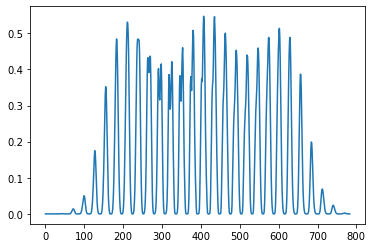

In [ ]:
plt.plot(Xmean);

What does this graph show? (What is the X-axis? What do those values represent?)

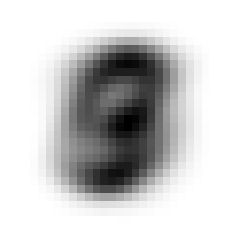

In [ ]:
plt.imshow(-Xmean.reshape((28, 28)), cmap='gray')
plt.axis('off');

So now, what is this?

In [ ]:
U, S, V = np.linalg.svd(Xtrain - Xmean, full_matrices=False)
V = V.T
V

array([[ 5.4937872e-20, -2.0486578e-19,  8.6535645e-21, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 4.1633363e-17,  0.0000000e+00,  2.2551405e-17, ...,
         3.5478824e-01, -1.5421115e-01, -1.4407927e-01],
       [-5.5511151e-17, -1.1102230e-16, -2.8102520e-16, ...,
        -7.3280878e-02,  7.8036547e-02,  1.7062239e-01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [ ]:
U.shape, S.shape, V.shape

((50000, 784), (784,), (784, 784))

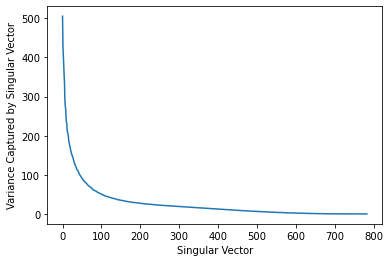

In [ ]:
plt.plot(S)
plt.xlabel('Singular Vector')
plt.ylabel('Variance Captured by Singular Vector');

What do the first 16 singular vectors look like?

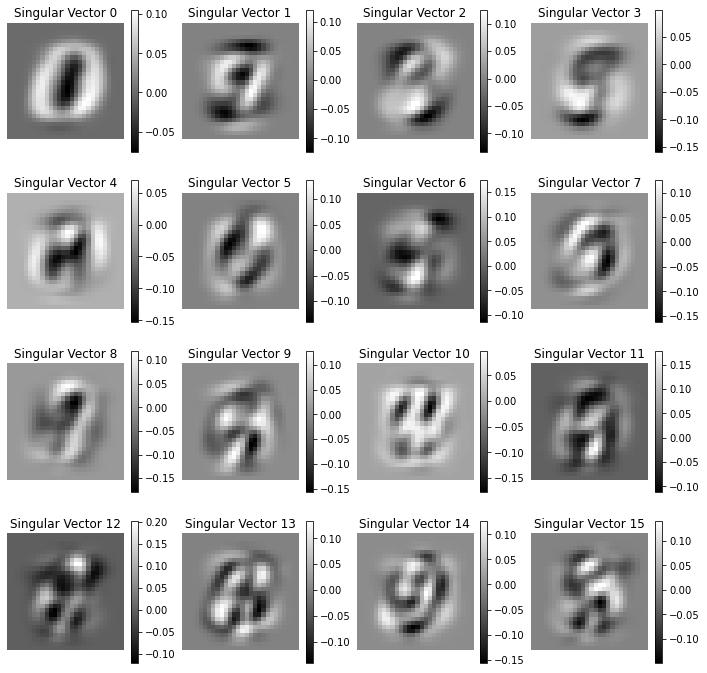

In [ ]:
plt.figure(figsize=(12, 12))
for vi in range(16):
    plt.subplot(4, 4, vi + 1)
    plt.imshow(V[:, vi].reshape((28, 28)), cmap='gray')
    plt.title(f'Singular Vector {vi}')
    plt.axis('off')
    plt.colorbar()

How about the last 16?

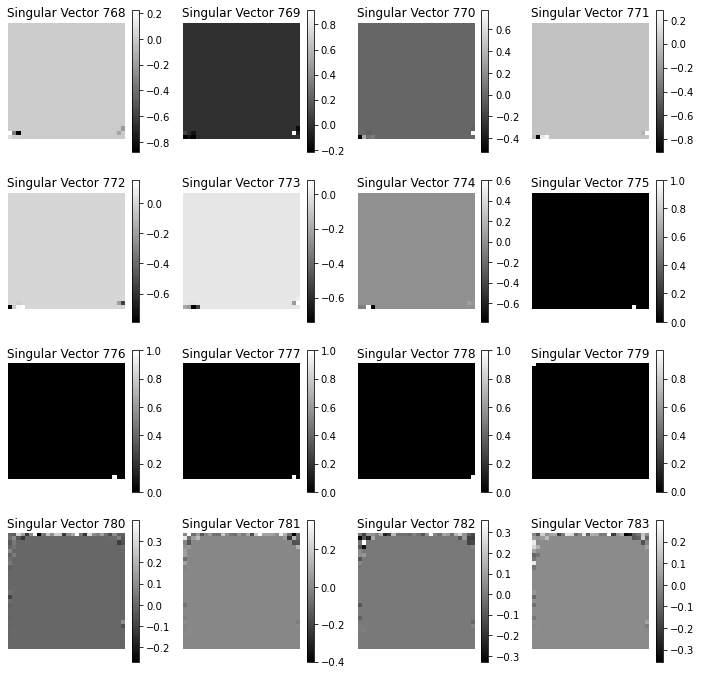

In [ ]:
plt.figure(figsize=(12, 12))
for vi in range(16):
    plt.subplot(4, 4, vi + 1)
    plt.imshow(V[:, 784 - 16 + vi].reshape((28, 28)), cmap='gray')
    plt.title(f'Singular Vector {784 - 16 + vi}')
    plt.axis('off')
    plt.colorbar()

Middle 16?

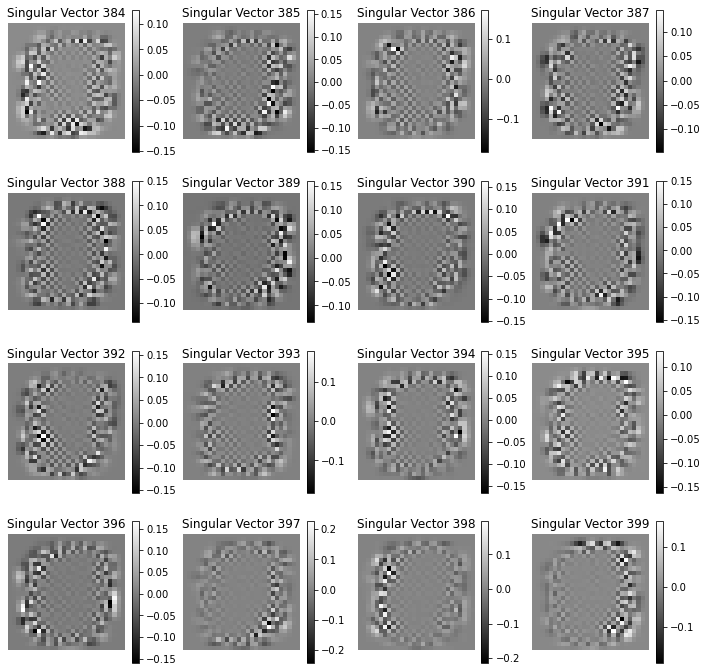

In [ ]:
plt.figure(figsize=(12, 12))
for vi in range(16):
    plt.subplot(4, 4, vi + 1)
    plt.imshow(V[:, 784 - 400 + vi].reshape((28, 28)), cmap='gray')
    plt.title(f'Singular Vector {784 - 400 + vi}')
    plt.axis('off')
    plt.colorbar()

Let's go back to the first one.  Remember, the color bar represents variance per pixel.  What does this represent with respect to MNIST digits?

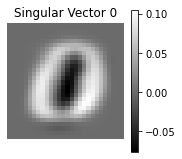

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(4, 4, 1)
plt.imshow(V[:, 0].reshape((28, 28)), cmap='gray')
plt.title(f'Singular Vector 0')
plt.axis('off')
plt.colorbar()

This is the first singular vector, so if projected onto this vector, the image preserves the most information at a lower dimensionality.

In [ ]:
X = Xtrain[:40, :] # take the first 40 samples and standardize them
X = X - Xmean
X.shape

(40, 784)

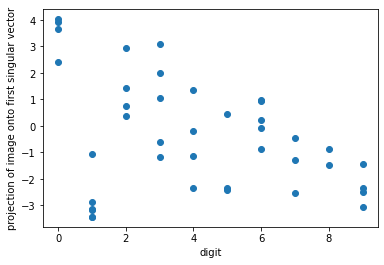

In [ ]:
p = (Xtrain[:40, :] - Xmean) @ V[:, 0:1]
plt.plot(Ttrain[:40,0], p, 'o')
plt.xlabel('digit')
plt.ylabel('projection of image onto first singular vector');

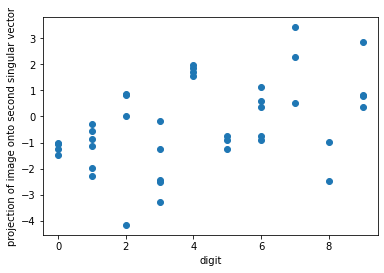

In [ ]:
p = (Xtrain[:40, :] - Xmean) @ V[:, 1:2]
plt.plot(Ttrain[:40,0], p, 'o')
plt.xlabel('digit')
plt.ylabel('projection of image onto second singular vector');

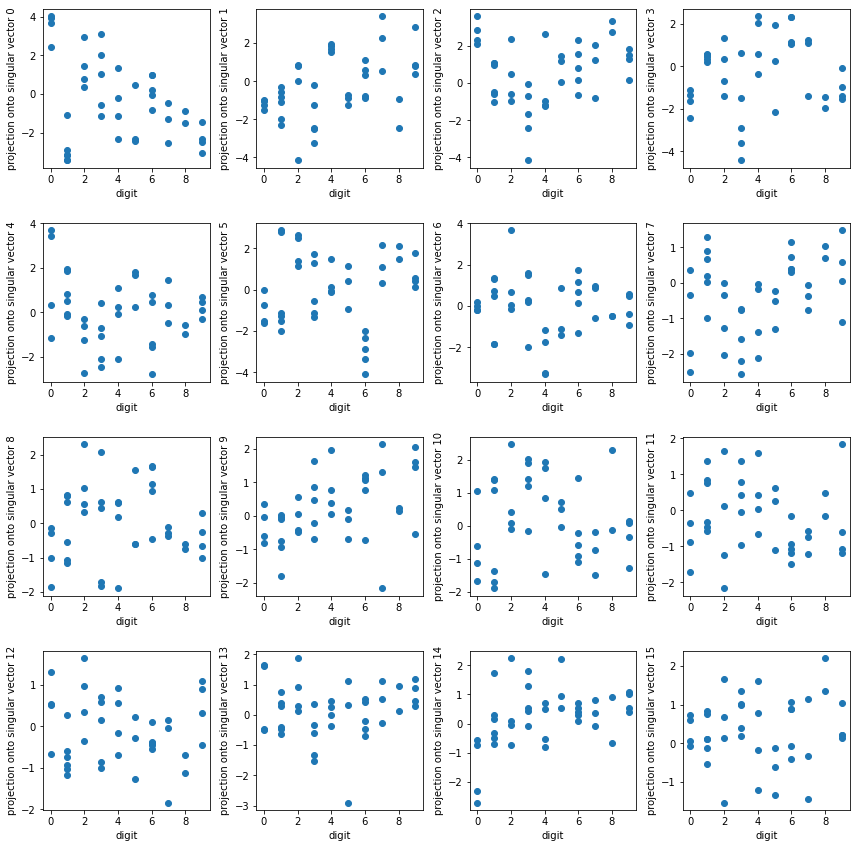

In [ ]:
plt.figure(figsize=(12, 12))
p = (Xtrain[:40, :] - Xmean) @ V[:, :16]
for vi in range(16):
    plt.subplot(4, 4, vi + 1)
    plt.plot(Ttrain[:40, 0], p[:, vi], 'o')
    plt.xlabel('digit')
    plt.ylabel(f'projection onto singular vector {vi:d}')
plt.tight_layout()

This is so meaningless it makes me angry!! Let's look at it differently.

First, we need to make sure that two singular vectors are indeed orthogonal.  Their dot product must be 0.

In [ ]:
i = np.random.randint(0,784)
j = np.random.randint(0,784)
print(i,j)
V[:, i:i+1].T @ V[:, j:j+1] # won't work if i == j

581 16


array([[5.820766e-11]], dtype=float32)

So they're orthogonal (or really close) (or there's a rounding error).

(-8.0, 8.0)

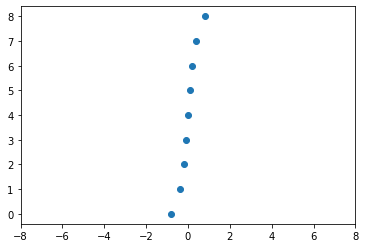

In [ ]:
# take a look at this dummy data for a sec
x = np.array([-.8,-.4,-.2,-.1,0,.1,.2,.4,.8])
y = np.array([0,1,2,3,4,5,6,7,8])
plt.plot(x, y, 'o')
plt.xlim(-8, 8)

What's the common factor?  Well, all values are pretty close to $x = 0$.  If were trying to guess a value in this dataset, guessing a point where $x = 0$ would be a pretty good strategy.  Most of the variance would be along a vector orthogonal to that.  The "first singular vector" $V_1$ for this data could be very close to $<0, 1>$. The second singular vector $V_2$ would be orthogonal to $V_1$.  Because so much more variance lies along $V_1$ than $V_2$, projecting the sample onto $V_1$ will get me closer to the original datapoint than projecting onto $V_2$.

(-8.0, 8.0)

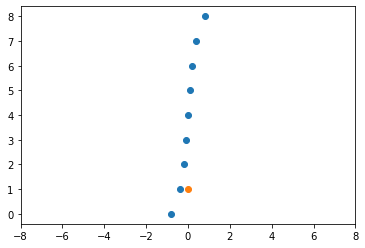

In [ ]:
# project onto V1
x = np.array([-.8,-.4,-.2,-.1,0,.1,.2,.4,.8])
y = np.array([0,1,2,3,4,5,6,7,8])
plt.plot(x, y, 'o')
plt.plot(np.mean(x), np.array([-.4,1]) @ np.array([0,1]), 'o')
plt.xlim(-8, 8)

(-8.0, 8.0)

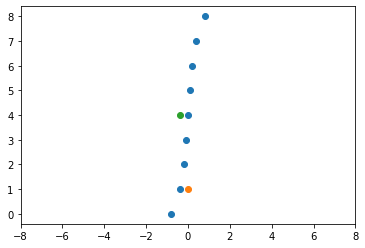

In [ ]:
# project onto V2
x = np.array([-.8,-.4,-.2,-.1,0,.1,.2,.4,.8])
y = np.array([0,1,2,3,4,5,6,7,8])
plt.plot(x, y, 'o')
plt.plot(np.mean(x), np.array([-.4,1]) @ np.array([0,1]), 'o')
plt.plot(np.array([-.4,1]) @ np.array([1,0]), np.mean(y), 'o')
plt.xlim(-8, 8)

Similarly, we can try to "guess" or reconstruct a sample from a higher-dimensional dataset by projecting it onto its singular vectors.  Let's take a look at an image, and its reconstruction using its projection on the first singular vector.

(-0.5, 27.5, 27.5, -0.5)

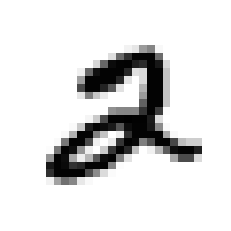

In [ ]:
plt.imshow(-Xtrain[5, :].reshape((28, 28)), cmap='gray')
plt.axis('off')

In [ ]:
p_all = (Xtrain[5:6, :] - Xmean) @ V  # projecting to all

In [ ]:
p_all.shape

(1, 784)

In [ ]:
# now take the first singular vector and multiply it by the first row in projection to all
(V[:, 0:1] @ p_all[:, 0:1]).shape

(784, 1)

In [ ]:
# add this to the mean of the dataset to get the reconstruction
recon = (V[:, 0:1] @ p_all[:, 0:1]).T + Xmean

In [ ]:
recon.shape

(1, 784)

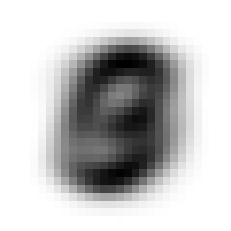

In [ ]:
plt.imshow(-recon.reshape((28,28)), cmap='gray')
plt.axis('off');

Looks a lot like the mean image.

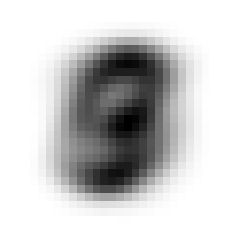

In [ ]:
plt.imshow(-Xmean.reshape((28, 28)), cmap='gray')
plt.axis('off');

So reconstructing based on the first singular vetor didn't clear much up.  What if we use the first two singular vectors, or the first three? How many dimensions to we need to get a reconstruction that is close to the original image?

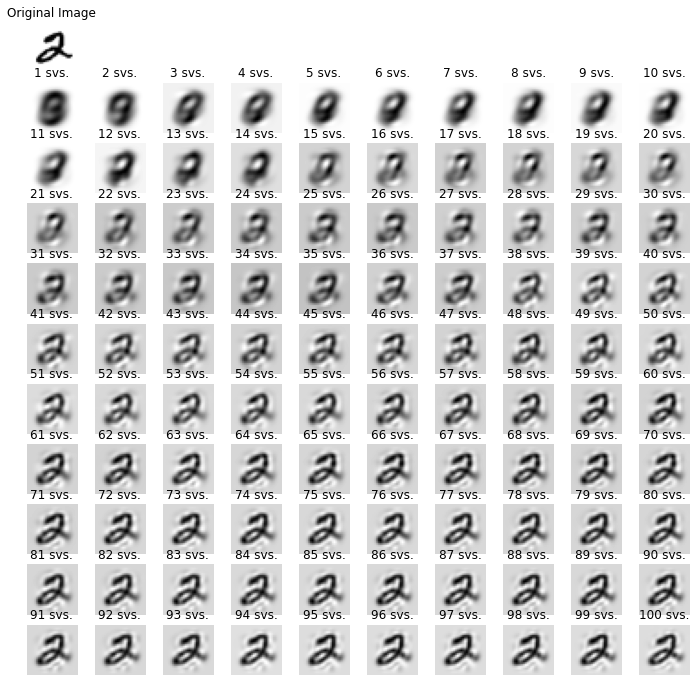

In [ ]:
plt.figure(figsize=(12, 12))

X = Xtrain[5, :]

proj = (X - Xmean) @ V
proj = proj.reshape(1, 784)

plt.subplot(11, 10, 1)
plt.imshow(-X.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.title('Original Image')

ploti = 10
for n_sv in range(1, 101):
    ploti += 1
    plt.subplot(11, 10, ploti)
    recon = (V[:, 0:n_sv] @ proj[:, 0:n_sv].T).T + Xmean
    plt.imshow(-recon.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'{n_sv} svs.')

Singular value decomposition is used heavily in image compression.  Surprised?

Now let's train a neural network to classify digits based on their pixels. You've done this.

In [ ]:
import neuralnetworks_A5 as nn

nnet = nn.NeuralNetworkClassifier(784, [100], 10)
nnet.train(Xtrain, Ttrain, 100, 0.01, method='adam', verbose=True)

Adam: Epoch 10 Error=0.95572
Adam: Epoch 20 Error=0.97221
Adam: Epoch 30 Error=0.97878
Adam: Epoch 40 Error=0.98258
Adam: Epoch 50 Error=0.98523
Adam: Epoch 60 Error=0.98726
Adam: Epoch 70 Error=0.98889
Adam: Epoch 80 Error=0.99022
Adam: Epoch 90 Error=0.99135
Adam: Epoch 100 Error=0.99233


NeuralNetworkClassifier(784, [100], 10, 'tanh')

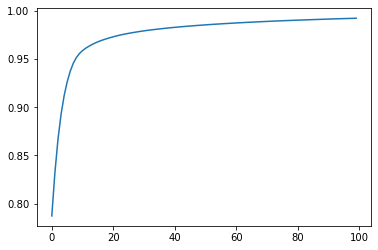

In [ ]:
plt.plot(nnet.error_trace);

In [ ]:
def percent_correct(T, C):
    return np.sum(C == T) / len(T) * 100

def print_percent_correct(nnet, Xtrain, Ttrain, Xtest, Ttest):
    Ctrain, _ = nnet.use(Xtrain)
    Ctest, _ = nnet.use(Xtest)
    Ptrain = np.sum(Ctrain == Ttrain) / len(Ttrain) * 100
    Ptest = np.sum(Ctest == Ttest) / len(Ttest) * 100
    print(f'% Correct: Train {percent_correct(Ttrain, Ctrain):.2f} Test {percent_correct(Ttest, Ctest):.2f}')

In [ ]:
print_percent_correct(nnet, Xtrain, Ttrain, Xtest, Ttest)

% Correct: Train 98.19 Test 94.96


Pretty good, right?  But it was very slow.  Let's try training a neural net that receives just the projections of each image onto the first three singular vectors, so three values for each image, instead of 784!!!

In [ ]:
Xmean = Xtrain.mean(0)
Xtrainm = Xtrain - Xmean
Xtestm = Xtest - Xmean

In [ ]:
nnet = nn.NeuralNetworkClassifier(3, [100], 10)
Xtrainm3 = Xtrainm @ V[:, :3]
Xtestm3 = Xtestm @ V[:, :3]
nnet.train(Xtrainm3, Ttrain, 100, 0.01, method='adam', verbose=True)

Adam: Epoch 10 Error=0.85306
Adam: Epoch 20 Error=0.86977
Adam: Epoch 30 Error=0.87328
Adam: Epoch 40 Error=0.87514
Adam: Epoch 50 Error=0.87699
Adam: Epoch 60 Error=0.87881
Adam: Epoch 70 Error=0.88029
Adam: Epoch 80 Error=0.88122
Adam: Epoch 90 Error=0.88193
Adam: Epoch 100 Error=0.88251


NeuralNetworkClassifier(3, [100], 10, 'tanh')

In [ ]:
print_percent_correct(nnet, Xtrainm3, Ttrain, Xtestm3, Ttest)

% Correct: Train 49.90 Test 51.11


So, projecting 784 down to 3 dimensions does not do well.  Let's check accuracy for projecting down to dimensions from 1 to 60.

In [ ]:
# DO NOT RUN LIVE FROM HERE BELOW!!  YOU WILL REGRET IT!!!
results = []
for n_dim in range(1, 60, 2):

    Xtrainmn = Xtrainm @ V[:, :n_dim]
    Xtestmn = Xtestm @ V[:, :n_dim]

    nnet = nn.NeuralNetworkClassifier(n_dim, [100], 10)
    nnet.train(Xtrainmn, Ttrain, 100, 0.01, method='adam', verbose=False)

    Ctrain, _ = nnet.use(Xtrainmn)
    Ctest, _ = nnet.use(Xtestmn)
    result = [n_dim, percent_correct(Ttrain, Ctrain), percent_correct(Ttest, Ctest)]
    print(result)
    results.append(result)

Adam: Epoch 10 Error=0.82311
Adam: Epoch 20 Error=0.83090
Adam: Epoch 30 Error=0.83242
Adam: Epoch 40 Error=0.83259
Adam: Epoch 50 Error=0.83269
Adam: Epoch 60 Error=0.83278
Adam: Epoch 70 Error=0.83282
Adam: Epoch 80 Error=0.83285
Adam: Epoch 90 Error=0.83287
Adam: Epoch 100 Error=0.83289
[1, 30.477999999999998, 31.180000000000003]
Adam: Epoch 10 Error=0.84943
Adam: Epoch 20 Error=0.86878
Adam: Epoch 30 Error=0.87350
Adam: Epoch 40 Error=0.87517
Adam: Epoch 50 Error=0.87701
Adam: Epoch 60 Error=0.87868
Adam: Epoch 70 Error=0.87995
Adam: Epoch 80 Error=0.88090
Adam: Epoch 90 Error=0.88170
Adam: Epoch 100 Error=0.88235
[3, 49.748, 51.300000000000004]
Adam: Epoch 10 Error=0.87045
Adam: Epoch 20 Error=0.90151
Adam: Epoch 30 Error=0.90968
Adam: Epoch 40 Error=0.91257
Adam: Epoch 50 Error=0.91434
Adam: Epoch 60 Error=0.91616
Adam: Epoch 70 Error=0.91804
Adam: Epoch 80 Error=0.92000
Adam: Epoch 90 Error=0.92198
Adam: Epoch 100 Error=0.92377
[5, 71.44, 72.87]
Adam: Epoch 10 Error=0.87663
Adam

Adam: Epoch 10 Error=0.90193
Adam: Epoch 20 Error=0.95674
Adam: Epoch 30 Error=0.96727
Adam: Epoch 40 Error=0.97232
Adam: Epoch 50 Error=0.97569
Adam: Epoch 60 Error=0.97828
Adam: Epoch 70 Error=0.98045
Adam: Epoch 80 Error=0.98234
Adam: Epoch 90 Error=0.98400
Adam: Epoch 100 Error=0.98547
[53, 96.028, 95.35]
Adam: Epoch 10 Error=0.89976
Adam: Epoch 20 Error=0.95565
Adam: Epoch 30 Error=0.96679
Adam: Epoch 40 Error=0.97192
Adam: Epoch 50 Error=0.97526
Adam: Epoch 60 Error=0.97777
Adam: Epoch 70 Error=0.97986
Adam: Epoch 80 Error=0.98170
Adam: Epoch 90 Error=0.98333
Adam: Epoch 100 Error=0.98478
[55, 95.85000000000001, 94.89]
Adam: Epoch 10 Error=0.89838
Adam: Epoch 20 Error=0.95559
Adam: Epoch 30 Error=0.96726
Adam: Epoch 40 Error=0.97248
Adam: Epoch 50 Error=0.97589
Adam: Epoch 60 Error=0.97844
Adam: Epoch 70 Error=0.98052
Adam: Epoch 80 Error=0.98234
Adam: Epoch 90 Error=0.98396
Adam: Epoch 100 Error=0.98541
[57, 96.014, 95.27]
Adam: Epoch 10 Error=0.90264
Adam: Epoch 20 Error=0.9579

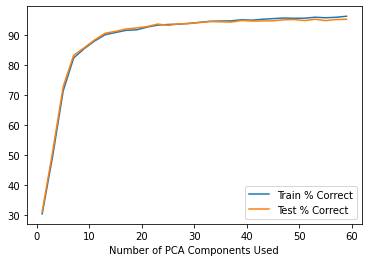

In [ ]:
results = np.array(results)
plt.plot(results[:, 0], results[:, 1], label='Train % Correct')
plt.plot(results[:, 0], results[:, 2], label='Test % Correct')
plt.legend()
plt.xlabel('Number of PCA Components Used');

## Compare to neural net with 10 hidden units

In [ ]:
nnet = nn.NeuralNetworkClassifier(784, [10], 10)
# nnet.train(Xtrain, Ttrain, 500, 0.01, method='adam', verbose=True)
nnet.train(Xtrain, Ttrain, 100, 0.01, method='adam', verbose=True)
nnet

Adam: Epoch 10 Error=0.85064
Adam: Epoch 20 Error=0.89440
Adam: Epoch 30 Error=0.92394
Adam: Epoch 40 Error=0.94083
Adam: Epoch 50 Error=0.95042
Adam: Epoch 60 Error=0.95626
Adam: Epoch 70 Error=0.96017
Adam: Epoch 80 Error=0.96305
Adam: Epoch 90 Error=0.96528
Adam: Epoch 100 Error=0.96707


NeuralNetworkClassifier(784, [10], 10, 'tanh')

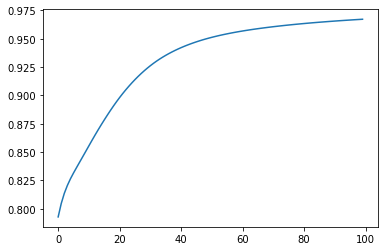

In [ ]:
plt.plot(nnet.error_trace);

In [ ]:
print_percent_correct(nnet, Xtrain, Ttrain, Xtest, Ttest)

% Correct: Train 91.65 Test 90.11


The weights in the first layer, of 10 units, can be reshaped into images to see what patterns they detect in the digits.

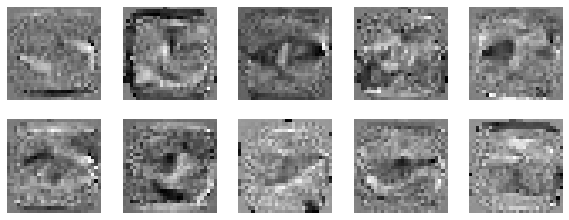

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(nnet.Ws[0][1:, i].reshape((28, 28)), cmap='gray')
    plt.axis('off')

Here are the first 10 singular vectors again.

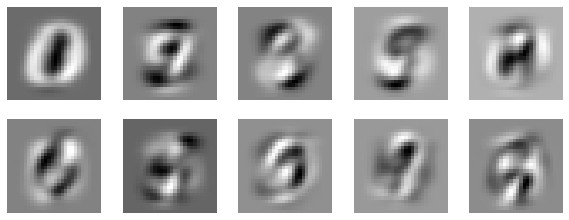

In [ ]:
plt.figure(figsize=(10, 10))
for vi in range(10):
    plt.subplot(5, 5, vi + 1)
    plt.imshow(V[:, vi].reshape((28, 28)), cmap='gray')
    plt.axis('off')


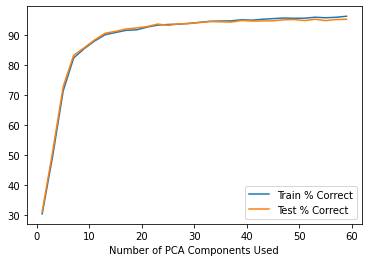

In [ ]:
# view this chart again
results = np.array(results)
plt.plot(results[:, 0], results[:, 1], label='Train % Correct')
plt.plot(results[:, 0], results[:, 2], label='Test % Correct')
plt.legend()
plt.xlabel('Number of PCA Components Used');

With 10 PCA components, we get to accuracy of about 85%, so not quite as good but quite a bit faster to train.